In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import plotly.graph_objects as go
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model 
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit


In [2]:
data = pd.read_csv('WHO-COVID-19-global-data.csv', header=None, low_memory=False) #skiprows=1 - to remove first row
data.head()

,0,1,2,3,4,5,6,7
0,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0


In [3]:
#data.rename(columns=data.iloc[0]).drop(data.index[0])
new_header = data.iloc[0] #grab the first row for the header
data = data[1:] #take the data less the header row
data.columns = new_header #set the header row as the df header
data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
5,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
148595,2021-09-16,ZW,Zimbabwe,AFRO,266,127083,1,4551
148596,2021-09-17,ZW,Zimbabwe,AFRO,285,127368,9,4560
148597,2021-09-18,ZW,Zimbabwe,AFRO,264,127632,2,4562
148598,2021-09-19,ZW,Zimbabwe,AFRO,107,127739,1,4563


In [4]:
data['Country']

1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
5         Afghanistan
             ...     
148595       Zimbabwe
148596       Zimbabwe
148597       Zimbabwe
148598       Zimbabwe
148599       Zimbabwe
Name: Country, Length: 148599, dtype: object

In [5]:
condn= data["Country"].isin(['Oman','Saudi Arabia','United Arab Emirates'])
df = data.loc[condn]
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
98440,2020-01-03,OM,Oman,EMRO,0,0,0,0
98441,2020-01-04,OM,Oman,EMRO,0,0,0,0
98442,2020-01-05,OM,Oman,EMRO,0,0,0,0
98443,2020-01-06,OM,Oman,EMRO,0,0,0,0
98444,2020-01-07,OM,Oman,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
141071,2021-09-16,AE,United Arab Emirates,EMRO,608,730743,2,2068
141072,2021-09-17,AE,United Arab Emirates,EMRO,564,731307,1,2069
141073,2021-09-18,AE,United Arab Emirates,EMRO,521,731828,2,2071
141074,2021-09-19,AE,United Arab Emirates,EMRO,471,732299,2,2073


In [6]:
df_Oman = data.loc[data["Country"].isin(['Oman'])]
df_SA = data.loc[data["Country"].isin(['Saudi Arabia'])]
df_UAE = data.loc[data["Country"].isin(['United Arab Emirates'])]
df_Oman

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
98440,2020-01-03,OM,Oman,EMRO,0,0,0,0
98441,2020-01-04,OM,Oman,EMRO,0,0,0,0
98442,2020-01-05,OM,Oman,EMRO,0,0,0,0
98443,2020-01-06,OM,Oman,EMRO,0,0,0,0
98444,2020-01-07,OM,Oman,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
99062,2021-09-16,OM,Oman,EMRO,45,303268,0,4090
99063,2021-09-17,OM,Oman,EMRO,41,303309,2,4092
99064,2021-09-18,OM,Oman,EMRO,0,303309,0,4092
99065,2021-09-19,OM,Oman,EMRO,0,303309,0,4092


In [7]:
dfOman = df_Oman.groupby('Date_reported')[['Cumulative_cases','New_cases', 'Cumulative_deaths']].sum().reset_index()
dfSA=df_SA.groupby('Date_reported').sum()[['Cumulative_cases','New_cases', 'Cumulative_deaths']].reset_index()
dfUAE=df_UAE.groupby('Date_reported').sum()[['Cumulative_cases','New_cases', 'Cumulative_deaths']].reset_index()

In [8]:
#Oman
for i in range (0, dfOman.shape[0]):
    if (float(dfOman['Cumulative_cases'].iloc[i])>110):
        break
dfOman=dfOman[i:]
dfOman=dfOman[(dfOman != 0)]
columns=['New_cases','Cumulative_cases']
dfOman=dfOman.reset_index(drop=True)

#Converting "Observation Date" into Datetime format
dfOman['Day_num']=0
dfOman['Date_reported']=pd.to_datetime(dfOman['Date_reported'])
for i in range (0,dfOman.shape[0]):
    dfOman['Day_num'].iloc[i]=(dfOman['Date_reported'].iloc[i]-dfOman['Date_reported'][0])/np.timedelta64(1, 'D')
    #dfOman['Day_num'].iloc[i] = dfOman['Date_reported'].iloc[i].dt.days.astype('int16')

dfOman

C:\Users\lnazr\miniconda3\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Date_reported,Cumulative_cases,New_cases,Cumulative_deaths,Day_num
0,2020-03-27,131,22,0,0
1,2020-03-28,152,21,0,1
2,2020-03-29,167,15,0,2
3,2020-03-30,179,12,0,3
4,2020-03-31,192,13,0,4
...,...,...,...,...,...
538,2021-09-16,303268,45,4090,538
539,2021-09-17,303309,41,4092,539
540,2021-09-18,303309,0,4092,540
541,2021-09-19,303309,0,4092,541


In [ ]:
# #Sa
# for i in range (0, dfSA.shape[0]):
#     if (float(dfSA['Cumulative_cases'].iloc[i])>110):
#         break
# dfSA=dfSA[i:]
# dfSA=dfSA[(dfSA != 0)]
# columns=['New_cases','Cumulative_cases']
# dfSA=dfSA.reset_index(drop=True)

# #Converting "Observation Date" into Datetime format
# dfSA['Day_num']=0
# dfSA['Date_reported']=pd.to_datetime(dfSA['Date_reported'])
# #date0.dtypes
# for i in range (0,dfSA.shape[0]):
#     dfSA['Day_num'].iloc[i]=(dfSA['Date_reported'][i]-dfSA['Date_reported'][0])/np.timedelta64(1, 'D')

# dfSA

In [ ]:
# #UAE
# for i in range (0, dfUAE.shape[0]):
#     if (float(dfUAE['Cumulative_cases'].iloc[i])>110):
#         break
# dfUAE=dfUAE[i:]
# dfUAE=dfUAE[(dfUAE != 0)]
# columns=['New_cases','Cumulative_cases']
# dfUAE=dfUAE.reset_index(drop=True)

# dfUAE['Day_num']=0
# dfUAE['Date_reported']=pd.to_datetime(dfUAE['Date_reported'])
# for i in range (0,dfUAE.shape[0]):
#     dfUAE['Day_num'].iloc[i]=(dfUAE['Date_reported'].iloc[i]-dfUAE['Date_reported'][0])/np.timedelta64(1, 'D')

# dfUAE

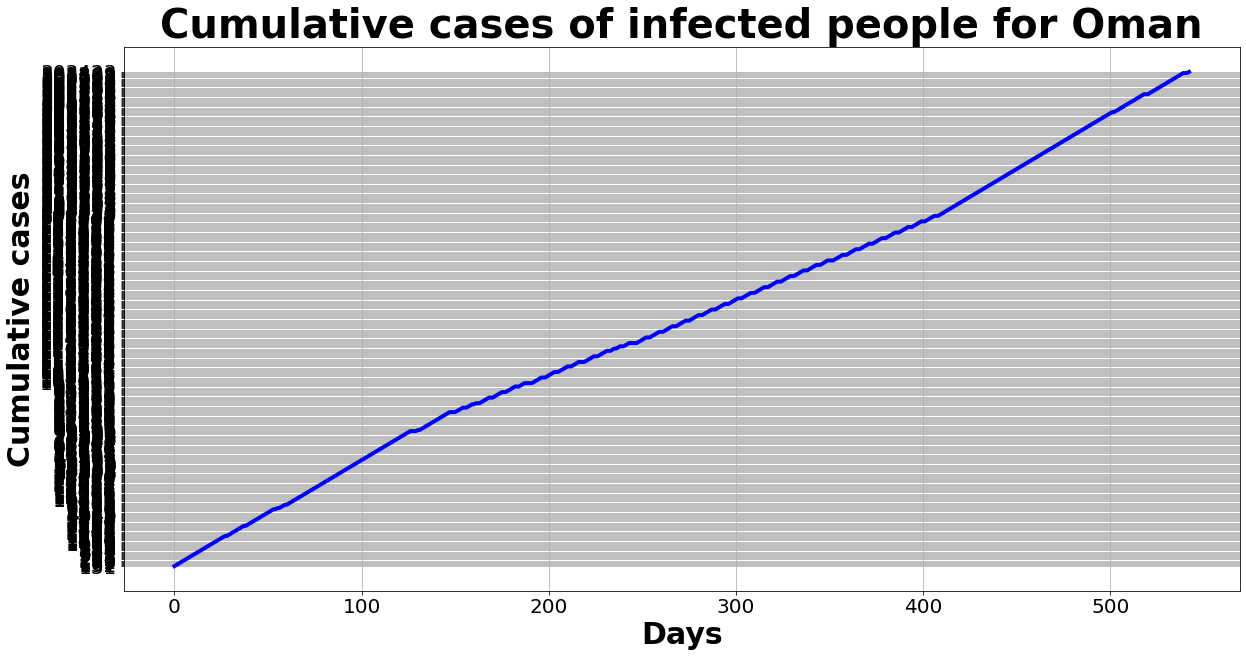

In [46]:
plt.figure(figsize=(20,10))
plt.title('Cumulative cases of infected people for Oman',fontsize=40,weight='bold')
plt.xlabel('Days',fontsize=30,weight='bold')
plt.ylabel('Cumulative cases',fontsize=30,weight='bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
#plt.legend(['Oman'],prop={'size': 20})
plt.grid()
plt.plot(dfOman['Day_num'], dfOman['Cumulative_cases'], 'b',linewidth=4)
plt.show()

In [ ]:
#x= np.array(ww_dfOman)
#y= np.array(ww_dfOman)

In [48]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=dfOman['Day_num'], y=dfOman['Cumulative_cases'], mode='lines+markers', name='Cases',line=dict(color='Blue', width=1)))
#fig.add_trace(go.Scatter(x=dfOman['Day_num'],y=dfOman['Cumulative_deaths'], mode='lines+markers', name='Death',line=dict(color='Red', width=1)))

fig.update_layout(autotypenumbers='convert types')
#plt.ylim(-6,88,-1.8)
fig.show()

In [ ]:
# fig=go.Figure()
# fig.add_trace(go.Scatter(x=dfSA['Date_reported'], y=dfSA['Cumulative_cases'], mode='lines+markers', name='Cases',line=dict(color='Blue', width=1)))
# fig.add_trace(go.Scatter(x=dfSA['Date_reported'],y=dfSA['Cumulative_deaths'], mode='lines+markers', name='Death',line=dict(color='Red', width=1)))

# fig.update_layout(autotypenumbers='convert types')

# fig.show()

In [ ]:
# fig=go.Figure()
# fig.add_trace(go.Scatter(x=dfUAE['Date_reported'], y=dfUAE['Cumulative_cases'], mode='lines+markers', name='Cases',line=dict(color='Blue', width=1)))
# fig.add_trace(go.Scatter(x=dfUAE['Date_reported'],y=dfUAE['Cumulative_deaths'], mode='lines+markers', name='Death',line=dict(color='Red', width=1)))

# fig.update_layout(autotypenumbers='convert types')

# fig.show()

In [10]:
dfOman['Norm']=(dfOman['Cumulative_cases']).astype(float)/5107000
dfUAE['Norm']=(dfUAE['Cumulative_cases']).astype(float)/9890000
dfSA['Norm']=(dfSA['Cumulative_cases']).astype(float)/34810000

In [11]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=dfOman['Date_reported'], y=dfOman['Cumulative_cases'], mode='lines+markers', name='Oman',line=dict(color='Orange', width=1)))
fig.add_trace(go.Scatter(x=dfSA['Date_reported'],y=dfSA['Cumulative_cases'], mode='lines+markers', name='Saudi Arabia',line=dict(color='Blue', width=1)))
fig.add_trace(go.Scatter(x=dfUAE['Date_reported'],y=dfUAE['Cumulative_cases'], mode='lines+markers', name='United Arab Emirates',line=dict(color='Red', width=1)))

fig.update_layout(autotypenumbers='convert types')

fig.show()

<h1>Normalized cumulative data</h1> 

In [12]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=dfOman['Date_reported'], y=dfOman['Norm'], mode='lines+markers', name='Oman',line=dict(color='Orange', width=1)))
fig.add_trace(go.Scatter(x=dfSA['Date_reported'],y=dfSA['Norm'], mode='lines+markers', name='Saudi Arabia',line=dict(color='Blue', width=1)))
fig.add_trace(go.Scatter(x=dfUAE['Date_reported'],y=dfUAE['Norm'], mode='lines+markers', name='United Arab Emirates',line=dict(color='Red', width=1)))

fig.update_layout(autotypenumbers='convert types')

fig.show()

<h1>Log of Normalised Values </h1>


In [13]:
dfOman['Log']=np.log((dfOman['Norm']).astype(float))
dfUAE['Log']=np.log((dfUAE['Norm']).astype(float))
dfSA['Log']=np.log((dfSA['Norm']).astype(float))

C:\Users\lnazr\miniconda3\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning:

divide by zero encountered in log



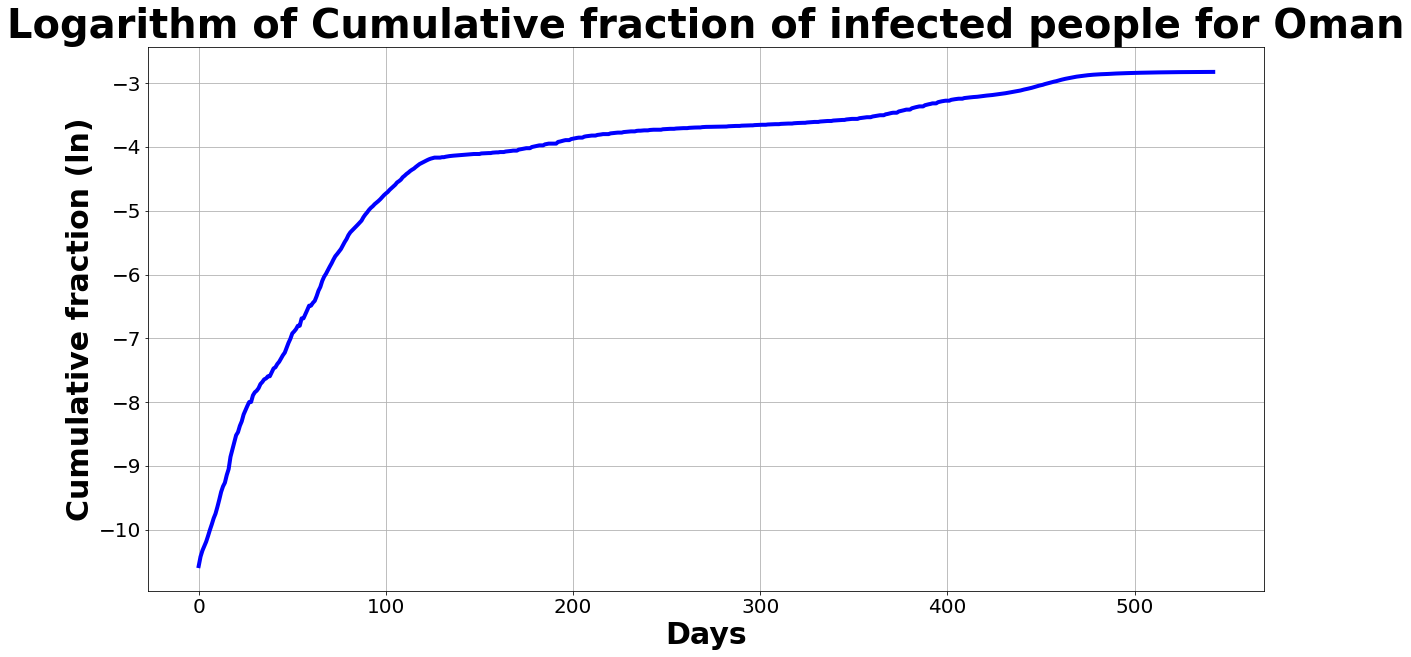

In [45]:
plt.figure(figsize=(20,10))
plt.title('Logarithm of Cumulative fraction of infected people for Oman',fontsize=40,weight='bold')
plt.xlabel('Days',fontsize=30,weight='bold')
plt.ylabel('Cumulative fraction (ln)',fontsize=30,weight='bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
#plt.legend(['Oman'],prop={'size': 20})
plt.grid()
plt.plot(dfOman['Day_num'], dfOman['Log'], 'b',linewidth=4)
plt.show()

In [ ]:
#ww_dfOman['Slope']= ww_dfOman.New_cases
#for i in range (0, len(ww_dfOman)-1):
 #   ww_dfOman['Slope'].iloc[i]=(int(ww_dfOman['New_cases'].iloc[i])- int(ww_dfOman['New_cases'].iloc[i+1]))/int(ww_dfOman['New_cases'].iloc[i])
    

In [15]:
## Slope intercept of wave 1 oman 
x = np.array(dfOman['Day_num']).reshape(-1,1)
y = np.array(dfOman['Log'])


lr1= LinearRegression()
LR1= lr1.fit(x[0:75],y[0:75])
pred1= lr1.predict(x[0:75])

slope_oman1 = lr1.coef_ 
intercept_oman1 = lr1.intercept_
print(slope_oman1)
intercept_oman1


[0.06164879]


-10.052109379771991

In [16]:
#Slope intercept of wave 2 oman 
x = np.array(dfOman['Day_num']).reshape(-1,1)
y = np.array(dfOman['Log'])


lr2= LinearRegression()
LR2= lr2.fit(x[75:120],y[75:120])
pred2= lr2.predict(x[75:120])

slope_oman2 = lr2.coef_ 
intercept_oman2 = lr2.intercept_
print(slope_oman2)
intercept_oman2


[0.03078244]


-7.839067065637185

In [17]:
#Slope intercept of wave 3 oman 
x = np.array(dfOman['Day_num']).reshape(-1,1)
y = np.array(dfOman['Log'])


lr3= LinearRegression()
LR= lr3.fit(x[121:452],y[121:452])
pred= lr3.predict(x[121:452])

slope_oman3 = lr3.coef_ 
intercept_oman3 = lr3.intercept_
print(slope_oman3)
intercept_oman3


[0.00310752]


-4.548160486654919

In [ ]:
# x = np.array(dfOman['Day_num']).reshape(-1, 1)
# y = np.array(dfOman['Log'])
# # Create linear regression object
# regr = linear_model.LinearRegression()
# model = regr.fit(x[0:124],y[0:124])
# y_pred= model.predict(x[0:124])
# #[a, b], res1 = curve_fit(lambda x1,a,b: a*np.exp(b*x1),  x,  y)
# #y1 = a * np.exp(b * x)

# plt.figure(figsize=(20,10))
# plt.title('Logarithm of Cumulative fraction of infected people for Oman',fontsize=40,weight='bold')
# plt.xlabel('Days',fontsize=30,weight='bold')
# plt.ylabel('Cumulative fraction (ln)',fontsize=30,weight='bold')
# plt.yticks(fontsize=20)
# plt.xticks(fontsize=20)
# plt.legend(['Oman'],prop={'size': 20})


# plt.plot(x[0:124], y[0:124], 'b',linewidth=4)
# plt.plot(x[0:124],y_pred, 'r')
# # The coefficients

# plt.show()
# slope_oman = regr.coef_ 
# intercept_oman = regr.intercept_
# print('Slope: \n', regr.coef_)
# print('Intercept: \n', regr.intercept_)

In [ ]:
# a = np.array(dfSA['Day_num'])
# b= np.array(dfSA['Log'])

# gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
# mn2=np.min(x)
# mx2=np.max(x)
# x2=np.linspace(mn2,mx2,500)
# y2=gradient*x1+intercept
# plt.plot(a,b,'-b')
# plt.plot(x2,y2,'-r')
# plt.show()
# dfSA

In [ ]:
# c = np.array(dfUAE['Day_num'])
# d = np.array(dfUAE['Log'])

# gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
# mn3=np.min(x)
# mx3=np.max(x)
# x3=np.linspace(mn3,mx3,500)
# y3=gradient*x1+intercept
# plt.plot(c,d,'-b')
# plt.plot(x3,y3,'-r')
# plt.show()

<h2>Exponential Graphs for EXP_model</h2>

In [20]:
#Calculating Exp(a+rt) for Oman

dfOman['Exp_model(art)']= dfOman.New_cases
dfOman['Exp_model_EXPart']=dfOman.New_cases
for i in range (0,75):
    dfOman['Exp_model(art)'].iloc[i]= intercept_oman1 + slope_oman1*dfOman['Day_num'].iloc[i]
    dfOman['Exp_model_EXPart'].iloc[i]= np.exp(dfOman['Exp_model(art)'].iloc[i])
for i in range (75,120):
    dfOman['Exp_model(art)'].iloc[i]= intercept_oman2 + slope_oman2*dfOman['Day_num'].iloc[i]
    dfOman['Exp_model_EXPart'].iloc[i]= np.exp(dfOman['Exp_model(art)'].iloc[i])    
for i in range (121,543):
    dfOman['Exp_model(art)'].iloc[i]= intercept_oman3 + slope_oman3*dfOman['Day_num'].iloc[i]
    dfOman['Exp_model_EXPart'].iloc[i]= np.exp(dfOman['Exp_model(art)'].iloc[i])    
    
# #Calculating Exp(a+rt) for Saudi

# dfSA['a+rt']= dfSA.New_cases
# dfSA['Exp_art']=dfSA.New_cases
# for i in range (0,dfSA.shape[0]):
#     dfSA['a+rt'].iloc[i]= intercept_saudi + slope_saudi*dfSA['Day_num'].iloc[i]
#     dfSA['Exp_art'].iloc[i]= np.exp(dfSA['a+rt'].iloc[i])
    
# #Calculating Exp(a+rt) for UAE

# dfUAE['a+rt']= dfUAE.New_cases
# dfUAE['Exp_art']=dfUAE.New_cases
# for i in range (0,dfUAE.shape[0]):
#     dfUAE['a+rt'].iloc[i]= intercept_uae + slope_uae*dfUAE['Day_num'].iloc[i]
#     dfUAE['Exp_art'].iloc[i]= np.exp(dfUAE['a+rt'].iloc[i])
    
dfOman

C:\Users\lnazr\miniconda3\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date_reported,Cumulative_cases,New_cases,Cumulative_deaths,Day_num,Norm,Log,Exp_model(art),Exp_model_EXPart
0,2020-03-27,131,22,0,0,0.000026,-10.570925,[-10.052109379771991],[4.3094749924444976e-05]
1,2020-03-28,152,21,0,1,0.000030,-10.422242,[-9.990460594357009],[4.5835090395579427e-05]
2,2020-03-29,167,15,0,2,0.000033,-10.328129,[-9.928811808942028],[4.874968564046009e-05]
3,2020-03-30,179,12,0,3,0.000035,-10.258737,[-9.867163023527045],[5.184961629906352e-05]
4,2020-03-31,192,13,0,4,0.000038,-10.188627,[-9.805514238112064],[5.514666761520343e-05]
...,...,...,...,...,...,...,...,...,...
538,2021-09-16,303268,45,4090,538,0.059383,-2.823751,[-2.8763153512433473],[0.056341981247305696]
539,2021-09-17,303309,41,4092,539,0.059391,-2.823615,[-2.873207832404292],[0.05651733733552222]
540,2021-09-18,303309,0,4092,540,0.059391,-2.823615,[-2.8701003135652368],[0.05669323919364235]
541,2021-09-19,303309,0,4092,541,0.059391,-2.823615,[-2.866992794726182],[0.056869688520294226]


In [ ]:
#Plotting Exponential model graph for Oman wave1
x = np.array(dfOman['Day_num'])
y = np.array(dfOman['Exp_model_EXPart'])
z = np.array(dfOman['Norm'])

plt.figure(figsize=(20,10))
plt.title('Exponential Model prediction for Oman - Wave 1',fontsize=40,weight='bold')
plt.xlabel('Days',fontsize=30,weight='bold')
plt.ylabel('Cumulative fraction',fontsize=30,weight='bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()

plt.plot(x[0:75], y[0:75], 'b',linewidth=4)
plt.plot(x[0:75], z[0:75], 'g',linewidth=4)
plt.legend(['Predicted','Observed'],prop={'size': 20})
plt.savefig('Exp_model_for_Oman.png')



In [ ]:
#Plotting Exponential model graph for Oman wave 2
x = np.array(dfOman['Day_num'])
y = np.array(dfOman['Exp_model_EXPart'])
z = np.array(dfOman['Norm'])

plt.figure(figsize=(20,10))
plt.title('Exponential Model prediction for Oman - Wave 2',fontsize=40,weight='bold')
plt.xlabel('Days',fontsize=30,weight='bold')
plt.ylabel('Cumulative fraction',fontsize=30,weight='bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()

plt.plot(x[75:120], y[75:120], 'b',linewidth=4)
plt.plot(x[75:120], z[75:120], 'g',linewidth=4)
plt.legend(['Predicted','Observed'],prop={'size': 20})
plt.savefig('Exp_model_for_Oman.png')



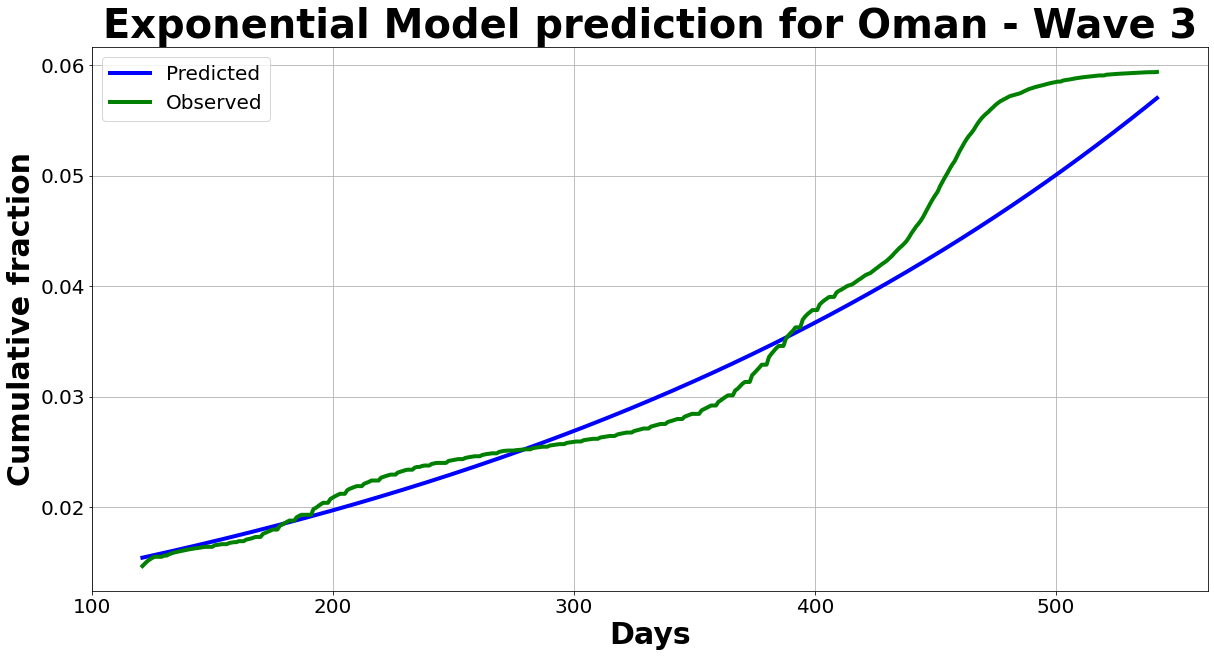

In [22]:
#Plotting Exponential model graph for Oman wave 3
x = np.array(dfOman['Day_num'])
y = np.array(dfOman['Exp_model_EXPart'])
z = np.array(dfOman['Norm'])

plt.figure(figsize=(20,10))
plt.title('Exponential Model prediction for Oman - Wave 3',fontsize=40,weight='bold')
plt.xlabel('Days',fontsize=30,weight='bold')
plt.ylabel('Cumulative fraction',fontsize=30,weight='bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()

plt.plot(x[121:543], y[121:543], 'b',linewidth=4)
plt.plot(x[121:543], z[121:543], 'g',linewidth=4)
plt.legend(['Predicted','Observed'],prop={'size': 20})
plt.savefig('Exp_model_for_Oman.png')



<h2>Error Prediction for EXP model</h2>

In [25]:
#Error Oman
dfOman['Error_exp']= dfOman.New_cases
for i in range (0,75):
    dfOman['Error_exp'].iloc[i]= dfOman['Norm'].iloc[i]-dfOman['Exp_model_EXPart'].iloc[i]
for i in range (75,120):
    dfOman['Error_exp'].iloc[i]= dfOman['Norm'].iloc[i]-dfOman['Exp_model_EXPart'].iloc[i]
for i in range (121,543):
    dfOman['Error_exp'].iloc[i]= dfOman['Norm'].iloc[i]-dfOman['Exp_model_EXPart'].iloc[i]

# #Error Saudi
# dfSA['Error_exp']= dfSA.New_cases
# for i in range (0,dfSA.shape[0]):
#     dfSA['Error_exp'].iloc[i]= dfSA['Norm'].iloc[i]-dfSA['Exp_art'].iloc[i]

# #Error UAE
# dfUAE['Error_exp']= dfUAE.New_cases
# for i in range (0,dfUAE.shape[0]):
dfOman

C:\Users\lnazr\miniconda3\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date_reported,Cumulative_cases,New_cases,Cumulative_deaths,Day_num,Norm,Log,Exp_model(art),Exp_model_EXPart,Error_exp
0,2020-03-27,131,22,0,0,0.000026,-10.570925,[-10.052109379771991],[4.3094749924444976e-05],[-1.744368276172714e-05]
1,2020-03-28,152,21,0,1,0.000030,-10.422242,[-9.990460594357009],[4.5835090395579427e-05],[-1.607202009990682e-05]
2,2020-03-29,167,15,0,2,0.000033,-10.328129,[-9.928811808942028],[4.874968564046009e-05],[-1.6049470249819792e-05]
3,2020-03-30,179,12,0,3,0.000035,-10.258737,[-9.867163023527045],[5.184961629906352e-05],[-1.679968483244907e-05]
4,2020-03-31,192,13,0,4,0.000038,-10.188627,[-9.805514238112064],[5.514666761520343e-05],[-1.755121039961698e-05]
...,...,...,...,...,...,...,...,...,...,...
538,2021-09-16,303268,45,4090,538,0.059383,-2.823751,[-2.8763153512433473],[0.056341981247305696],[0.0030408266634050912]
539,2021-09-17,303309,41,4092,539,0.059391,-2.823615,[-2.873207832404292],[0.05651733733552222],[0.002873498771781481]
540,2021-09-18,303309,0,4092,540,0.059391,-2.823615,[-2.8701003135652368],[0.05669323919364235],[0.0026975969136613515]
541,2021-09-19,303309,0,4092,541,0.059391,-2.823615,[-2.866992794726182],[0.056869688520294226],[0.002521147587009477]


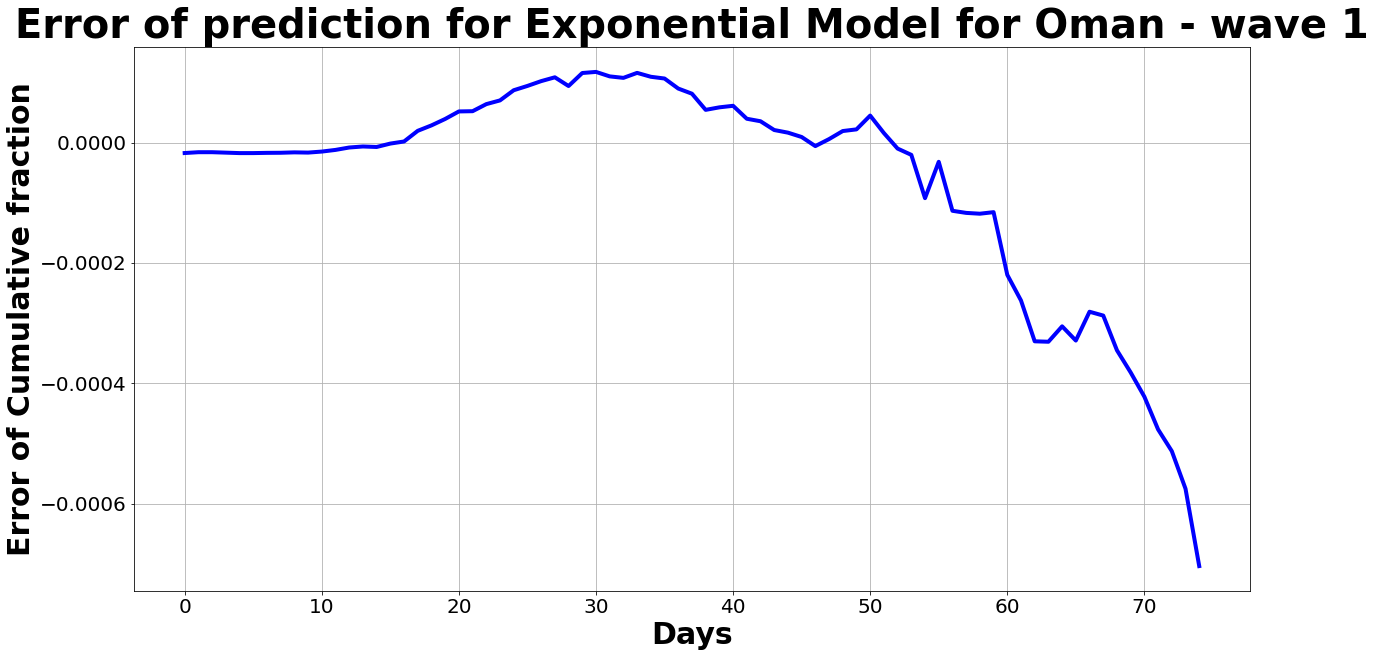

In [26]:
#Plotting Exponential model graph for UAE
x = np.array(dfOman['Day_num'])
y= np.array(dfOman['Error_exp'])
plt.figure(figsize=(20,10))
plt.title('Error of prediction for Exponential Model for Oman - wave 1',fontsize=40,weight='bold')
plt.xlabel('Days',fontsize=30,weight='bold')
plt.ylabel('Error of Cumulative fraction',fontsize=30,weight='bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()
plt.plot(x[0:75], y[0:75], 'b',linewidth=4)

  
#plt.legend(['Error'],prop={'size': 20})
plt.savefig('Exp_model_Error_for_Oman.png')

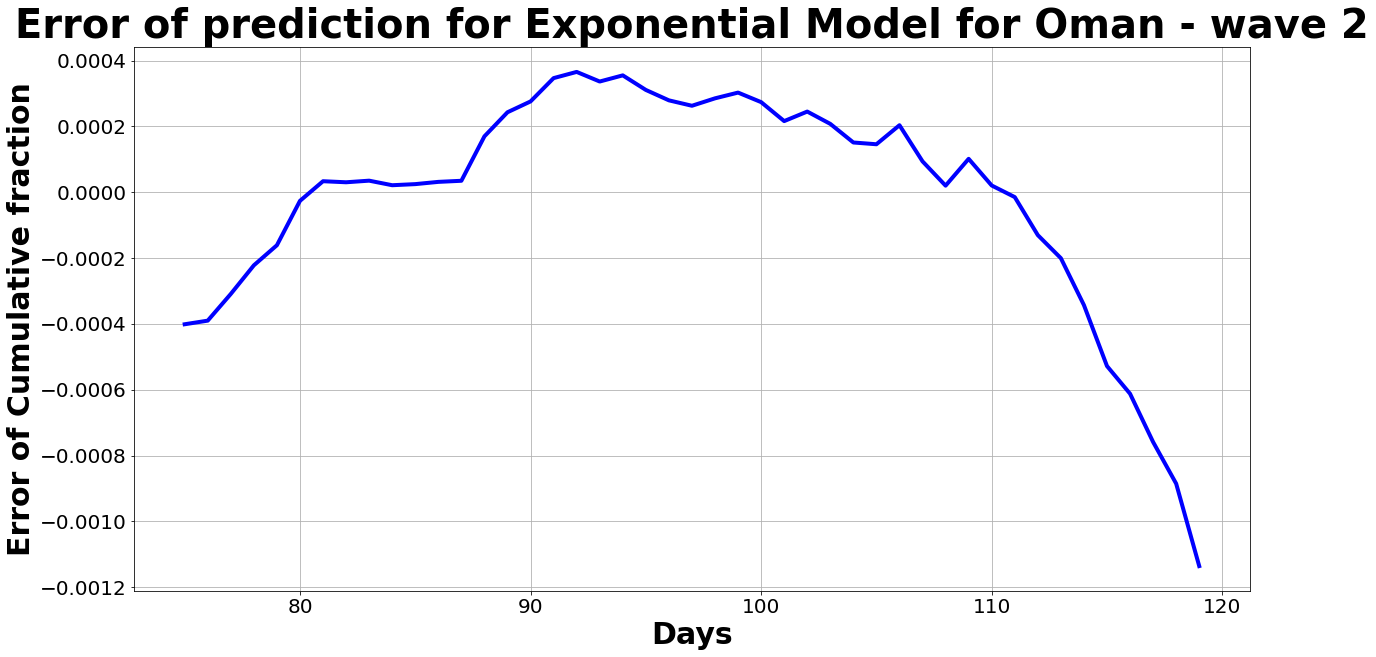

In [27]:
#Plotting Exponential model graph for UAE
x = np.array(dfOman['Day_num'])
y= np.array(dfOman['Error_exp'])
plt.figure(figsize=(20,10))
plt.title('Error of prediction for Exponential Model for Oman - wave 2',fontsize=40,weight='bold')
plt.xlabel('Days',fontsize=30,weight='bold')
plt.ylabel('Error of Cumulative fraction',fontsize=30,weight='bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()
plt.plot(x[75:120], y[75:120], 'b',linewidth=4)

  
#plt.legend(['Error'],prop={'size': 20})
plt.savefig('Exp_model_Error_for_Oman.png')

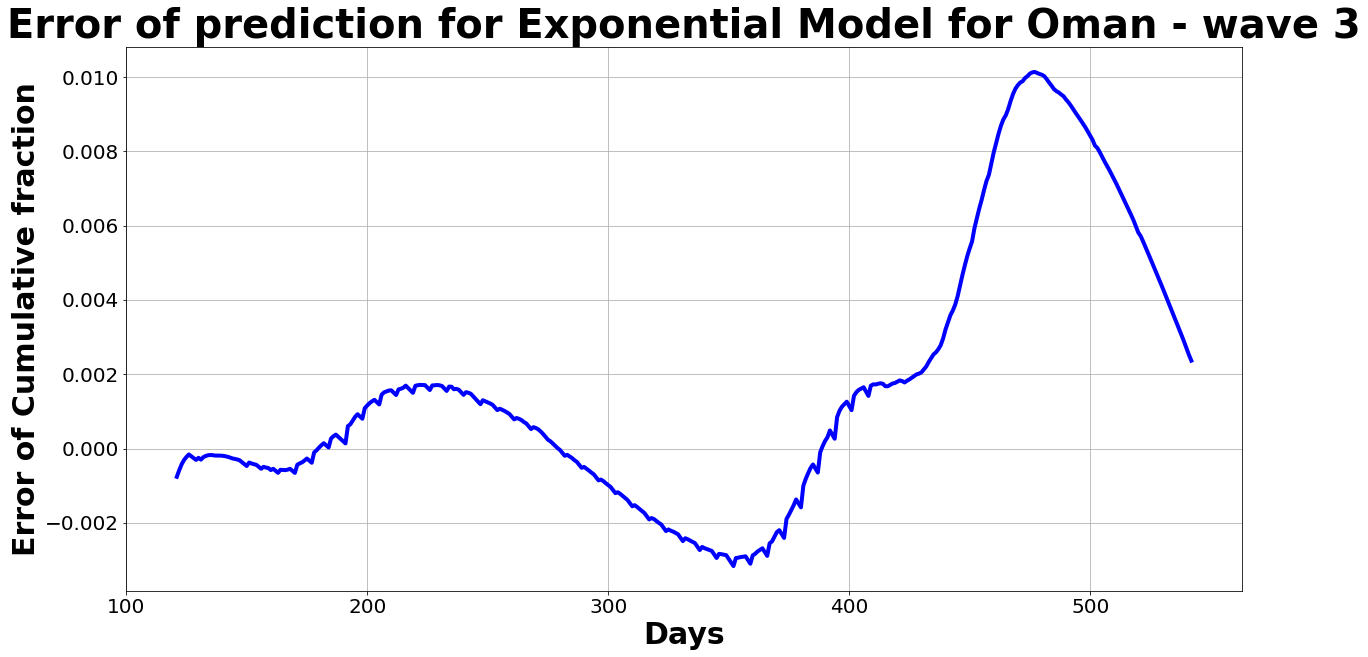

In [28]:
#Plotting Exponential model graph for UAE
x = np.array(dfOman['Day_num'])
y= np.array(dfOman['Error_exp'])
plt.figure(figsize=(20,10))
plt.title('Error of prediction for Exponential Model for Oman - wave 3',fontsize=40,weight='bold')
plt.xlabel('Days',fontsize=30,weight='bold')
plt.ylabel('Error of Cumulative fraction',fontsize=30,weight='bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()
plt.plot(x[121:543], y[121:543], 'b',linewidth=4)
#plt.legend(['Error'],prop={'size': 20})
plt.savefig('Exp_model_Error_for_Oman.png')

<h2>Carrying capacity K</h2>

In [29]:
#Calculating Carrying capacity for Oman
dfOman['Carrying_capacity']= dfOman.New_cases
for i in range (0,75):
    dfOman['Carrying_capacity'].iloc[i]= dfOman['Norm'].iloc[i]*((1+dfOman['Exp_model_EXPart'].iloc[i])/dfOman['Exp_model_EXPart'].iloc[i])
for i in range (75,120):
    dfOman['Carrying_capacity'].iloc[i]= dfOman['Norm'].iloc[i]*((1+dfOman['Exp_model_EXPart'].iloc[i])/dfOman['Exp_model_EXPart'].iloc[i])
for i in range (121,543):
    dfOman['Carrying_capacity'].iloc[i]= dfOman['Norm'].iloc[i]*((1+dfOman['Exp_model_EXPart'].iloc[i])/dfOman['Exp_model_EXPart'].iloc[i])

dfOman
# #Calculating Carrying capacity for Saudi
# dfSA['Carrying_capacity']= dfSA.New_cases
# #for i in range (0,dfSA.shape[0]):
# #    dfSA['Carrying_capacity'].iloc[i]= dfSA['Norm'].iloc[i]*((1+dfSA['Exp_art'].iloc[i])/dfSA['Exp_art'].iloc[i])

# #Calculating Carrying capacity for Saudi
# dfUAE['Carrying_capacity']= dfUAE.New_cases
# for i in range (0,dfUAE.shape[0]):
#     dfUAE['Carrying_capacity'].iloc[i]= dfUAE['Norm'].iloc[i]*((1+dfUAE['Exp_art'].iloc[i])/dfUAE['Exp_art'].iloc[i])

C:\Users\lnazr\miniconda3\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date_reported,Cumulative_cases,New_cases,Cumulative_deaths,Day_num,Norm,Log,Exp_model(art),Exp_model_EXPart,Error_exp,Carrying_capacity
0,2020-03-27,131,22,0,0,0.000026,-10.570925,[-10.052109379771991],[4.3094749924444976e-05],[-1.744368276172714e-05],[0.595250526665468]
1,2020-03-28,152,21,0,1,0.000030,-10.422242,[-9.990460594357009],[4.5835090395579427e-05],[-1.607202009990682e-05],[0.6493809487841807]
2,2020-03-29,167,15,0,2,0.000033,-10.328129,[-9.928811808942028],[4.874968564046009e-05],[-1.6049470249819792e-05],[0.6708106746994058]
3,2020-03-30,179,12,0,3,0.000035,-10.258737,[-9.867163023527045],[5.184961629906352e-05],[-1.679968483244907e-05],[0.6760271588113062]
4,2020-03-31,192,13,0,4,0.000038,-10.188627,[-9.805514238112064],[5.514666761520343e-05],[-1.755121039961698e-05],[0.6817733891395473]
...,...,...,...,...,...,...,...,...,...,...,...
538,2021-09-16,303268,45,4090,538,0.059383,-2.823751,[-2.8763153512433473],[0.056341981247305696],[0.0030408266634050912],[1.113353694203434]
539,2021-09-17,303309,41,4092,539,0.059391,-2.823615,[-2.873207832404292],[0.05651733733552222],[0.002873498771781481],[1.1102336200608822]
540,2021-09-18,303309,0,4092,540,0.059391,-2.823615,[-2.8701003135652368],[0.05669323919364235],[0.0026975969136613515],[1.1069731748840208]
541,2021-09-19,303309,0,4092,541,0.059391,-2.823615,[-2.866992794726182],[0.056869688520294226],[0.002521147587009477],[1.1037228458757375]


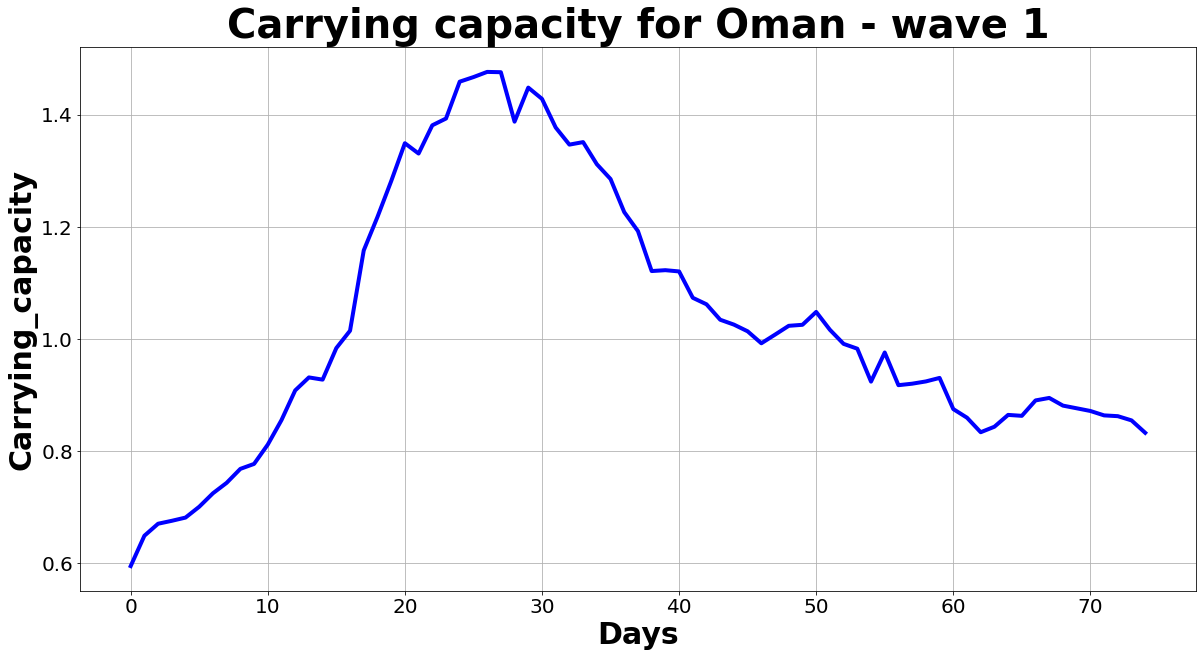

In [33]:
#Plotting Carrying capacity model graph for Oman - wave 1
x = np.array(dfOman['Day_num'])
y= np.array(dfOman['Carrying_capacity'])
plt.figure(figsize=(20,10))
plt.title('Carrying capacity for Oman - wave 1',fontsize=40,weight='bold')
plt.xlabel('Days',fontsize=30,weight='bold')
plt.ylabel('Carrying_capacity',fontsize=30,weight='bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()
plt.plot(x[0:75], y[0:75], 'b',linewidth=4)

  
#plt.legend(['Error'],prop={'size': 20})
plt.savefig('Exp_model_Error_for_Oman.png')

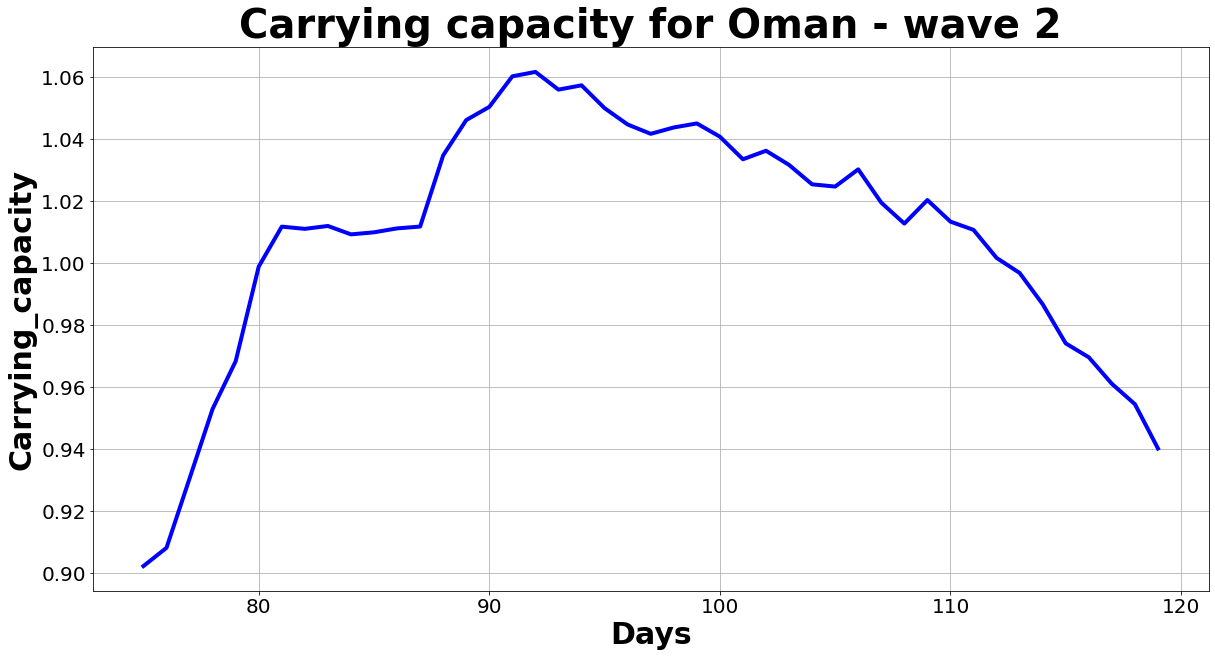

In [34]:
#Plotting Carrying capacity model graph for Oman - wave 2
x = np.array(dfOman['Day_num'])
y= np.array(dfOman['Carrying_capacity'])
plt.figure(figsize=(20,10))
plt.title('Carrying capacity for Oman - wave 2',fontsize=40,weight='bold')
plt.xlabel('Days',fontsize=30,weight='bold')
plt.ylabel('Carrying_capacity',fontsize=30,weight='bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()
plt.plot(x[75:120], y[75:120], 'b',linewidth=4)

  
#plt.legend(['Error'],prop={'size': 20})
plt.savefig('Exp_model_Error_for_Oman.png')

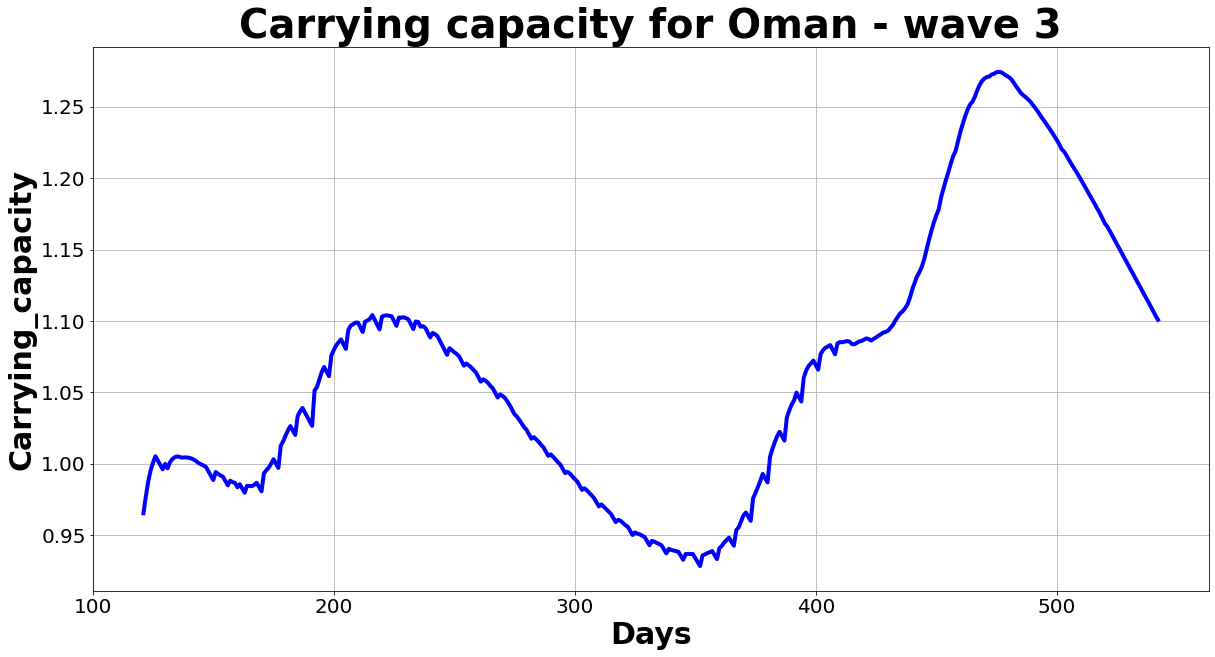

In [36]:
#Plotting Carrying capacity model graph for Oman - wave 3
x = np.array(dfOman['Day_num'])
y = np.array(dfOman['Carrying_capacity'])
plt.figure(figsize=(20,10))
plt.title('Carrying capacity for Oman - wave 3',fontsize=40,weight='bold')
plt.xlabel('Days',fontsize=30,weight='bold')
plt.ylabel('Carrying_capacity',fontsize=30,weight='bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()
plt.plot(x[121:543], y[121:543], 'b',linewidth=4)

plt.savefig('k3_for_Oman.png')

In [44]:
# #SSE for Exponential Model
# sse_em_Oman = sse_em_SA=sse_em_UAE=0
# for i in range (0,dfOman.shape[0]):
#     sse_em_Oman= sse_em_Oman + dfOman['Error_exp'].iloc[i]
#     #sse_em_SA = np.sum((dfSA['Error_exp'])**2)
#     #sse_em_UAE = np.sum((dfUAE['Error_exp'])**2)
# print (sse_em_Oman)
# #print (sse_em_SA)
# #print (sse_em_UAE)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [50]:
k_oman_in=0.595250526665468

<h2>Ln(P/K-P)</h2>

In [51]:
dfOman['Ln(P/K-P)_initial']= dfOman.New_cases
for i in range (0,75):
    dfOman['Ln(P/K-P)_initial'].iloc[i]= np.log(dfOman['Norm'].iloc[i]/(k_oman_in - dfOman['Norm'].iloc[i]))                                       
for i in range (75,120):
    dfOman['Ln(P/K-P)_initial'].iloc[i]= np.log(dfOman['Norm'].iloc[i]/(k_oman_in - dfOman['Norm'].iloc[i]))    
for i in range (121,543):
    dfOman['Ln(P/K-P)_initial'].iloc[i]= np.log(dfOman['Norm'].iloc[i]/(k_oman_in - dfOman['Norm'].iloc[i]))    
dfOman
# dfSA['Ln(P/K-P)']= dfSA.New_cases
# for i in range (0,dfSA.shape[0]):
#     dfSA['Ln(P/K-P)'].iloc[i]= np.log(dfSA['Norm'].iloc[i]/(ksa1 - dfSA['Norm'].iloc[i]))                                       

# dfUAE['Ln(P/K-P)']= dfUAE.New_cases
# for i in range (0,dfUAE.shape[0]):
#     dfUAE['Ln(P/K-P)'].iloc[i]= np.log(dfUAE['Norm'].iloc[i]/(kuae1 - dfUAE['Norm'].iloc[i]))                                       

C:\Users\lnazr\miniconda3\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date_reported,Cumulative_cases,New_cases,Cumulative_deaths,Day_num,Norm,Log,Exp_model(art),Exp_model_EXPart,Error_exp,Carrying_capacity,Ln(P/K-P),Ln(P/K-P)_initial
0,2020-03-27,131,22,0,0,0.000026,-10.570925,[-10.052109379771991],[4.3094749924444976e-05],[-1.744368276172714e-05],[0.595250526665468],-8.541118,-10.052109
1,2020-03-28,152,21,0,1,0.000030,-10.422242,[-9.990460594357009],[4.5835090395579427e-05],[-1.607202009990682e-05],[0.6493809487841807],-8.392404,-9.903419
2,2020-03-29,167,15,0,2,0.000033,-10.328129,[-9.928811808942028],[4.874968564046009e-05],[-1.6049470249819792e-05],[0.6708106746994058],-8.298268,-9.809301
3,2020-03-30,179,12,0,3,0.000035,-10.258737,[-9.867163023527045],[5.184961629906352e-05],[-1.679968483244907e-05],[0.6760271588113062],-8.228858,-9.739905
4,2020-03-31,192,13,0,4,0.000038,-10.188627,[-9.805514238112064],[5.514666761520343e-05],[-1.755121039961698e-05],[0.6817733891395473],-8.158729,-9.669791
...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,2021-09-16,303268,45,4090,538,0.059383,-2.823751,[-2.8763153512433473],[0.056341981247305696],[0.0030408266634050912],[1.113353694203434],-0.192712,-2.199883
539,2021-09-17,303309,41,4092,539,0.059391,-2.823615,[-2.873207832404292],[0.05651733733552222],[0.002873498771781481],[1.1102336200608822],-0.192466,-2.199732
540,2021-09-18,303309,0,4092,540,0.059391,-2.823615,[-2.8701003135652368],[0.05669323919364235],[0.0026975969136613515],[1.1069731748840208],-0.192466,-2.199732
541,2021-09-19,303309,0,4092,541,0.059391,-2.823615,[-2.866992794726182],[0.056869688520294226],[0.002521147587009477],[1.1037228458757375],-0.192466,-2.199732


In [69]:
#Slope intercept of wave 2 oman 
x = np.array(dfOman['Day_num']).reshape(-1,1)
y = np.array(dfOman['Ln(P/K-P)_initial'])


lr= LinearRegression()
LR= lr.fit(x[0:75],y[0:75])
pred= lr.predict(x[0:75])

slope_oman_log1 = lr.coef_ 
intercept_oman_log1 = lr.intercept_
print(slope_oman_log1)
intercept_oman_log1


[0.06171139]


-9.534219025362088

In [70]:
#Slope intercept of wave 2 oman 
x = np.array(dfOman['Day_num']).reshape(-1,1)
y = np.array(dfOman['Ln(P/K-P)_initial'])


lr= LinearRegression()
LR= lr.fit(x[75:120],y[75:120])
pred= lr.predict(x[75:120])

slope_oman_log2 = lr.coef_ 
intercept_oman_log2 = lr.intercept_
print(slope_oman_log2)
intercept_oman_log2


[0.03119755]


-7.346287764470549

In [71]:
#Slope intercept of wave 2 oman 
x = np.array(dfOman['Day_num']).reshape(-1,1)
y = np.array(dfOman['Ln(P/K-P)_initial'])


lr= LinearRegression()
LR= lr.fit(x[121:543],y[121:543])
pred= lr.predict(x[121:543])

slope_oman_log3 = lr.coef_ 
intercept_oman_log3 = lr.intercept_
print(slope_oman_log3)
intercept_oman_log3


[0.0036346]


-4.115617511399146

In [72]:
#Calculating Exp(a+rt) for Oman

dfOman['Lmini_art']= dfOman.New_cases
dfOman['Lmini_EXPart']=dfOman.New_cases
for i in range (0,75):
    dfOman['Lmini_art'].iloc[i]= intercept_oman_log1 + slope_oman_log1*dfOman['Day_num'].iloc[i]
    dfOman['Lmini_EXPart'].iloc[i]= np.exp(dfOman['Lmini_art'].iloc[i])
for i in range (75,120):
    dfOman['Lmini_art'].iloc[i]= intercept_oman_log2 + slope_oman_log2*dfOman['Day_num'].iloc[i]
    dfOman['Lmini_EXPart'].iloc[i]= np.exp(dfOman['Lmini_art'].iloc[i])    
for i in range (121,543):
    dfOman['Lmini_art'].iloc[i]= intercept_oman_log3 + slope_oman_log3*dfOman['Day_num'].iloc[i]
    dfOman['Lmini_EXPart'].iloc[i]= np.exp(dfOman['Lmini_art'].iloc[i])    
    
# #Calculating Exp(a+rt) for Saudi

# dfSA['a+rt']= dfSA.New_cases
# dfSA['Exp_art']=dfSA.New_cases
# for i in range (0,dfSA.shape[0]):
#     dfSA['a+rt'].iloc[i]= intercept_saudi + slope_saudi*dfSA['Day_num'].iloc[i]
#     dfSA['Exp_art'].iloc[i]= np.exp(dfSA['a+rt'].iloc[i])
    
# #Calculating Exp(a+rt) for UAE

# dfUAE['a+rt']= dfUAE.New_cases
# dfUAE['Exp_art']=dfUAE.New_cases
# for i in range (0,dfUAE.shape[0]):
#     dfUAE['a+rt'].iloc[i]= intercept_uae + slope_uae*dfUAE['Day_num'].iloc[i]
#     dfUAE['Exp_art'].iloc[i]= np.exp(dfUAE['a+rt'].iloc[i])
    
dfOman

C:\Users\lnazr\miniconda3\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date_reported,Cumulative_cases,New_cases,Cumulative_deaths,Day_num,Norm,Log,Exp_model(art),Exp_model_EXPart,Error_exp,Carrying_capacity,Ln(P/K-P),Ln(P/K-P)_initial,Lmini_art,Lmini_EXPart
0,2020-03-27,131,22,0,0,0.000026,-10.570925,[-10.052109379771991],[4.3094749924444976e-05],[-1.744368276172714e-05],[0.595250526665468],-8.541118,-10.052109,[-9.534219025362088],[7.233380116730441e-05]
1,2020-03-28,152,21,0,1,0.000030,-10.422242,[-9.990460594357009],[4.5835090395579427e-05],[-1.607202009990682e-05],[0.6493809487841807],-8.392404,-9.903419,[-9.472507634407922],[7.693823241860978e-05]
2,2020-03-29,167,15,0,2,0.000033,-10.328129,[-9.928811808942028],[4.874968564046009e-05],[-1.6049470249819792e-05],[0.6708106746994058],-8.298268,-9.809301,[-9.410796243453754],[8.183576021407397e-05]
3,2020-03-30,179,12,0,3,0.000035,-10.258737,[-9.867163023527045],[5.184961629906352e-05],[-1.679968483244907e-05],[0.6760271588113062],-8.228858,-9.739905,[-9.349084852499589],[8.704504170797028e-05]
4,2020-03-31,192,13,0,4,0.000038,-10.188627,[-9.805514238112064],[5.514666761520343e-05],[-1.755121039961698e-05],[0.6817733891395473],-8.158729,-9.669791,[-9.287373461545421],[9.258592168169593e-05]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,2021-09-16,303268,45,4090,538,0.059383,-2.823751,[-2.8763153512433473],[0.056341981247305696],[0.0030408266634050912],[1.113353694203434],-0.192712,-2.199883,[-2.1602012555641066],[0.11530191355116862]
539,2021-09-17,303309,41,4092,539,0.059391,-2.823615,[-2.873207832404292],[0.05651733733552222],[0.002873498771781481],[1.1102336200608822],-0.192466,-2.199732,[-2.1565666528580936],[0.1157217527102574]
540,2021-09-18,303309,0,4092,540,0.059391,-2.823615,[-2.8701003135652368],[0.05669323919364235],[0.0026975969136613515],[1.1069731748840208],-0.192466,-2.199732,[-2.1529320501520806],[0.11614312059436104]
541,2021-09-19,303309,0,4092,541,0.059391,-2.823615,[-2.866992794726182],[0.056869688520294226],[0.002521147587009477],[1.1037228458757375],-0.192466,-2.199732,[-2.1492974474460675],[0.1165660227698973]


In [73]:
dfOman['Logistic']= dfOman.New_cases
for i in range (0,75):
    dfOman['Logistic'].iloc[i]= k_oman_in* dfOman['Lmini_EXPart'].iloc[i]/(1 + dfOman['Lmini_EXPart'].iloc[i])                                    
for i in range (75,120):
    dfOman['Logistic'].iloc[i]= k_oman_in* dfOman['Lmini_EXPart'].iloc[i]/(1 + dfOman['Lmini_EXPart'].iloc[i])   
for i in range (121,543):
    dfOman['Logistic'].iloc[i]= k_oman_in* dfOman['Lmini_EXPart'].iloc[i]/(1 + dfOman['Lmini_EXPart'].iloc[i])    
dfOman

# dfSA['Ln(P/K-P)']= dfSA.New_cases
# for i in range (0,dfSA.shape[0]):
#     dfSA['Ln(P/K-P)'].iloc[i]= np.log(dfSA['Norm'].iloc[i]/(ksa1 - dfSA['Norm'].iloc[i]))                                       

# dfUAE['Ln(P/K-P)']= dfUAE.New_cases
# for i in range (0,dfUAE.shape[0]):
#     dfUAE['Ln(P/K-P)'].iloc[i]= np.log(dfUAE['Norm'].iloc[i]/(kuae1 - dfUAE['Norm'].iloc[i]))                                       

C:\Users\lnazr\miniconda3\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date_reported,Cumulative_cases,New_cases,Cumulative_deaths,Day_num,Norm,Log,Exp_model(art),Exp_model_EXPart,Error_exp,Carrying_capacity,Ln(P/K-P),Ln(P/K-P)_initial,Lmini_art,Lmini_EXPart,Logistic
0,2020-03-27,131,22,0,0,0.000026,-10.570925,[-10.052109379771991],[4.3094749924444976e-05],[-1.744368276172714e-05],[0.595250526665468],-8.541118,-10.052109,[-9.534219025362088],[7.233380116730441e-05],[4.305361900863629e-05]
1,2020-03-28,152,21,0,1,0.000030,-10.422242,[-9.990460594357009],[4.5835090395579427e-05],[-1.607202009990682e-05],[0.6493809487841807],-8.392404,-9.903419,[-9.472507634407922],[7.693823241860978e-05],[4.579400005846777e-05]
2,2020-03-29,167,15,0,2,0.000033,-10.328129,[-9.928811808942028],[4.874968564046009e-05],[-1.6049470249819792e-05],[0.6708106746994058],-8.298268,-9.809301,[-9.410796243453754],[8.183576021407397e-05],[4.870879324637205e-05]
3,2020-03-30,179,12,0,3,0.000035,-10.258737,[-9.867163023527045],[5.184961629906352e-05],[-1.679968483244907e-05],[0.6760271588113062],-8.228858,-9.739905,[-9.349084852499589],[8.704504170797028e-05],[5.180909719526073e-05]
4,2020-03-31,192,13,0,4,0.000038,-10.188627,[-9.805514238112064],[5.514666761520343e-05],[-1.755121039961698e-05],[0.6817733891395473],-8.158729,-9.669791,[-9.287373461545421],[9.258592168169593e-05],[5.5106716536695873e-05]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,2021-09-16,303268,45,4090,538,0.059383,-2.823751,[-2.8763153512433473],[0.056341981247305696],[0.0030408266634050912],[1.113353694203434],-0.192712,-2.199883,[-2.1602012555641066],[0.11530191355116862],[0.06153806779398174]
539,2021-09-17,303309,41,4092,539,0.059391,-2.823615,[-2.873207832404292],[0.05651733733552222],[0.002873498771781481],[1.1102336200608822],-0.192466,-2.199732,[-2.1565666528580936],[0.1157217527102574],[0.06173890047415805]
540,2021-09-18,303309,0,4092,540,0.059391,-2.823615,[-2.8701003135652368],[0.05669323919364235],[0.0026975969136613515],[1.1069731748840208],-0.192466,-2.199732,[-2.1529320501520806],[0.11614312059436104],[0.06194031251614888]
541,2021-09-19,303309,0,4092,541,0.059391,-2.823615,[-2.866992794726182],[0.056869688520294226],[0.002521147587009477],[1.1037228458757375],-0.192466,-2.199732,[-2.1492974474460675],[0.1165660227698973],[0.06214230509446499]


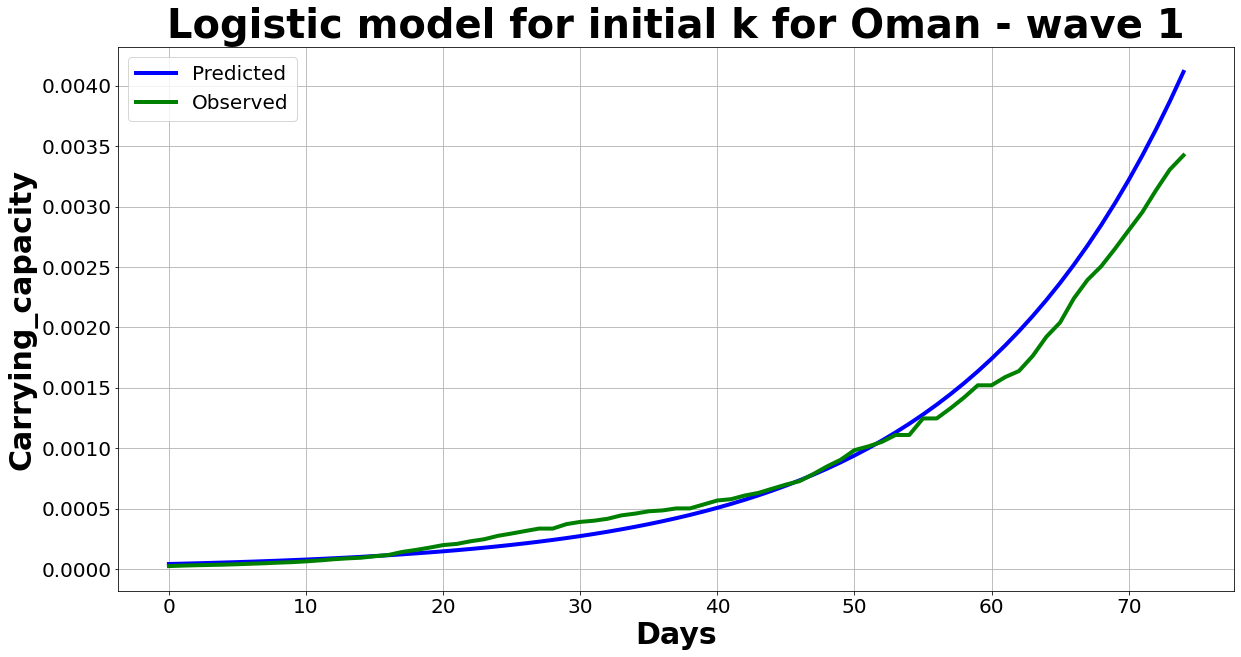

In [77]:
#Plotting Carrying capacity model graph for Oman - wave 1
x = np.array(dfOman['Day_num'])
y = np.array(dfOman['Logistic'])
z = np.array(dfOman['Norm'])

plt.figure(figsize=(20,10))
plt.title('Logistic model for initial k for Oman - wave 1',fontsize=40,weight='bold')
plt.xlabel('Days',fontsize=30,weight='bold')
plt.ylabel('Carrying_capacity',fontsize=30,weight='bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()
plt.plot(x[0:75], y[0:75], 'b',linewidth=4)
plt.plot(x[0:75], z[0:75], 'g',linewidth=4)
plt.legend(['Predicted','Observed'],prop={'size': 20})
plt.savefig('k3_for_Oman.png')

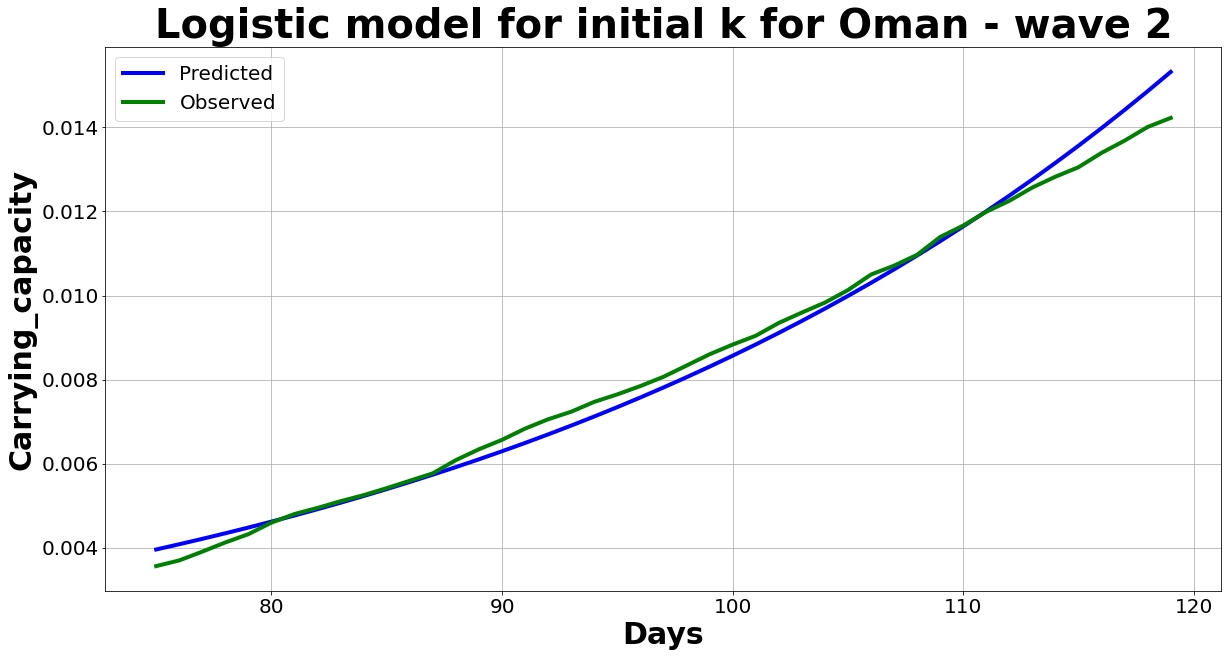

In [80]:
#Plotting Carrying capacity model graph for Oman - wave 3
x = np.array(dfOman['Day_num'])
y = np.array(dfOman['Logistic'])
z = np.array(dfOman['Norm'])

plt.figure(figsize=(20,10))
plt.title('Logistic model for initial k for Oman - wave 2',fontsize=40,weight='bold')
plt.xlabel('Days',fontsize=30,weight='bold')
plt.ylabel('Carrying_capacity',fontsize=30,weight='bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()
plt.plot(x[75:120], y[75:120], 'b',linewidth=4)
plt.plot(x[75:120], z[75:120], 'g',linewidth=4)
plt.legend(['Predicted','Observed'],prop={'size': 20})
plt.savefig('k3_for_Oman.png')

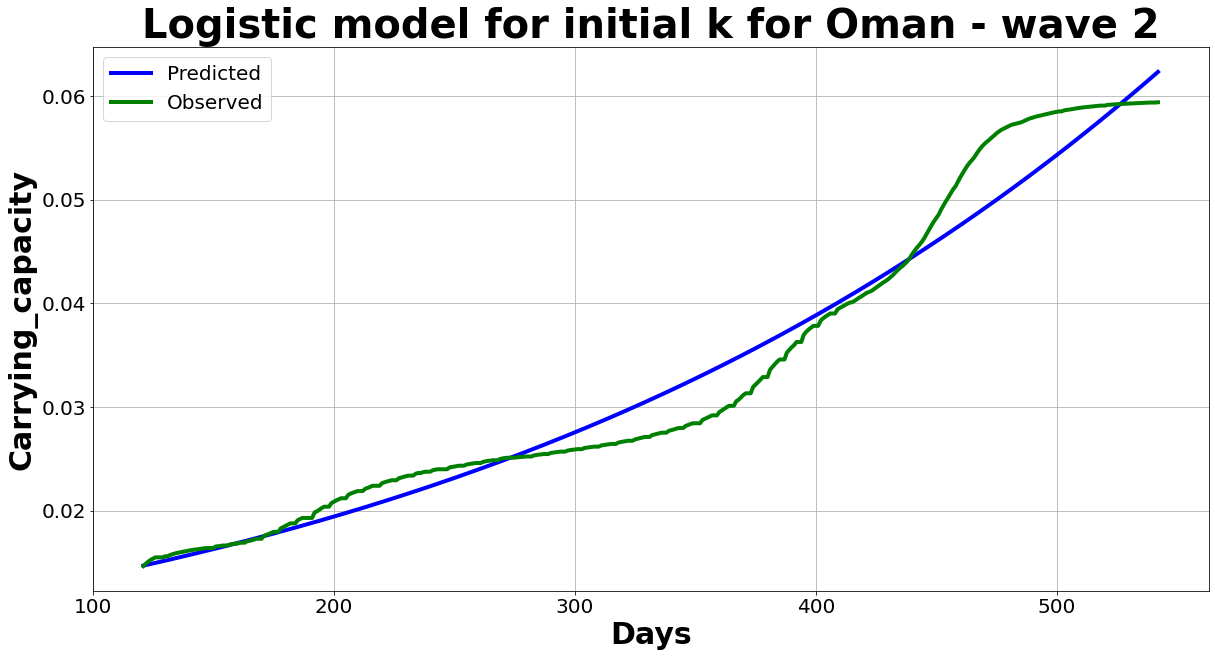

In [81]:
#Plotting Carrying capacity model graph for Oman - wave 3
x = np.array(dfOman['Day_num'])
y = np.array(dfOman['Logistic'])
z = np.array(dfOman['Norm'])

plt.figure(figsize=(20,10))
plt.title('Logistic model for initial k for Oman - wave 2',fontsize=40,weight='bold')
plt.xlabel('Days',fontsize=30,weight='bold')
plt.ylabel('Carrying_capacity',fontsize=30,weight='bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()
plt.plot(x[121:543], y[121:543], 'b',linewidth=4)
plt.plot(x[121:543], z[121:543], 'g',linewidth=4)
plt.legend(['Predicted','Observed'],prop={'size': 20})
plt.savefig('k3_for_Oman.png')

In [82]:
dfOman['Ln(P/K-P)']= dfOman.New_cases
for i in range (0,75):
    dfOman['Ln(P/K-P)'].iloc[i]= np.log(dfOman['Norm'].iloc[i]/(k_oman1 - dfOman['Norm'].iloc[i]))                                       
for i in range (75,120):
    dfOman['Ln(P/K-P)'].iloc[i]= np.log(dfOman['Norm'].iloc[i]/(k_oman1 - dfOman['Norm'].iloc[i]))    
for i in range (121,543):
    dfOman['Ln(P/K-P)'].iloc[i]= np.log(dfOman['Norm'].iloc[i]/(k_oman1 - dfOman['Norm'].iloc[i]))    
dfOman
# dfSA['Ln(P/K-P)']= dfSA.New_cases
# for i in range (0,dfSA.shape[0]):
#     dfSA['Ln(P/K-P)'].iloc[i]= np.log(dfSA['Norm'].iloc[i]/(ksa1 - dfSA['Norm'].iloc[i]))                                       

# dfUAE['Ln(P/K-P)']= dfUAE.New_cases
# for i in range (0,dfUAE.shape[0]):
#     dfUAE['Ln(P/K-P)'].iloc[i]= np.log(dfUAE['Norm'].iloc[i]/(kuae1 - dfUAE['Norm'].iloc[i]))                                       

C:\Users\lnazr\miniconda3\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date_reported,Cumulative_cases,New_cases,Cumulative_deaths,Day_num,Norm,Log,Exp_model(art),Exp_model_EXPart,Error_exp,Carrying_capacity,Ln(P/K-P),Ln(P/K-P)_initial,Lmini_art,Lmini_EXPart,Logistic
0,2020-03-27,131,22,0,0,0.000026,-10.570925,[-10.052109379771991],[4.3094749924444976e-05],[-1.744368276172714e-05],[0.595250526665468],-8.541118,-10.052109,[-9.534219025362088],[7.233380116730441e-05],[4.305361900863629e-05]
1,2020-03-28,152,21,0,1,0.000030,-10.422242,[-9.990460594357009],[4.5835090395579427e-05],[-1.607202009990682e-05],[0.6493809487841807],-8.392404,-9.903419,[-9.472507634407922],[7.693823241860978e-05],[4.579400005846777e-05]
2,2020-03-29,167,15,0,2,0.000033,-10.328129,[-9.928811808942028],[4.874968564046009e-05],[-1.6049470249819792e-05],[0.6708106746994058],-8.298268,-9.809301,[-9.410796243453754],[8.183576021407397e-05],[4.870879324637205e-05]
3,2020-03-30,179,12,0,3,0.000035,-10.258737,[-9.867163023527045],[5.184961629906352e-05],[-1.679968483244907e-05],[0.6760271588113062],-8.228858,-9.739905,[-9.349084852499589],[8.704504170797028e-05],[5.180909719526073e-05]
4,2020-03-31,192,13,0,4,0.000038,-10.188627,[-9.805514238112064],[5.514666761520343e-05],[-1.755121039961698e-05],[0.6817733891395473],-8.158729,-9.669791,[-9.287373461545421],[9.258592168169593e-05],[5.5106716536695873e-05]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,2021-09-16,303268,45,4090,538,0.059383,-2.823751,[-2.8763153512433473],[0.056341981247305696],[0.0030408266634050912],[1.113353694203434],-0.192712,-2.199883,[-2.1602012555641066],[0.11530191355116862],[0.06153806779398174]
539,2021-09-17,303309,41,4092,539,0.059391,-2.823615,[-2.873207832404292],[0.05651733733552222],[0.002873498771781481],[1.1102336200608822],-0.192466,-2.199732,[-2.1565666528580936],[0.1157217527102574],[0.06173890047415805]
540,2021-09-18,303309,0,4092,540,0.059391,-2.823615,[-2.8701003135652368],[0.05669323919364235],[0.0026975969136613515],[1.1069731748840208],-0.192466,-2.199732,[-2.1529320501520806],[0.11614312059436104],[0.06194031251614888]
541,2021-09-19,303309,0,4092,541,0.059391,-2.823615,[-2.866992794726182],[0.056869688520294226],[0.002521147587009477],[1.1037228458757375],-0.192466,-2.199732,[-2.1492974474460675],[0.1165660227698973],[0.06214230509446499]


In [88]:
#Slope intercept of wave 1 oman 
x = np.array(dfOman['Day_num']).reshape(-1,1)
y1 = np.array(dfOman['Ln(P/K-P)'])

lr_fi= LinearRegression()
LR_fi= lr_fi.fit(x[0:75],y1[0:75])
pred= lr_fi.predict(x[0:75])
slope_oman_f1 = lr_fi.coef_ 
intercept_oman_f1 = lr_fi.intercept_
print(slope_oman_f1)
intercept_oman_f1

[0.06193454]


-8.026538947121558

In [89]:
#Slope intercept of wave 1 oman 
x = np.array(dfOman['Day_num']).reshape(-1,1)
y1 = np.array(dfOman['Ln(P/K-P)'])

lr_fi= LinearRegression()
LR_fi= lr_fi.fit(x[75:120],y1[75:120])
pred= lr_fi.predict(x[75:120])
slope_oman_f2 = lr_fi.coef_ 
intercept_oman_f2 = lr_fi.intercept_
print(slope_oman_f2)
intercept_oman_f2

[0.03276733]


-5.935368009747669

In [90]:
#Slope intercept of wave 1 oman 
x = np.array(dfOman['Day_num']).reshape(-1,1)
y1 = np.array(dfOman['Ln(P/K-P)'])

lr_fi= LinearRegression()
LR_fi= lr_fi.fit(x[121:543],y1[121:543])
pred= lr_fi.predict(x[121:543])
slope_oman_f3 = lr_fi.coef_ 
intercept_oman_f3 = lr_fi.intercept_
print(slope_oman_f3)
intercept_oman_f3

[0.00465325]


-2.6946270598017192

In [95]:
#Calculating Exp(a+rt) for Oman

dfOman['Lm_art']= dfOman.New_cases
dfOman['Lm_EXPart']=dfOman.New_cases
for i in range (0,75):
    dfOman['Lm_art'].iloc[i]= intercept_oman_f1 + slope_oman_f1*dfOman['Day_num'].iloc[i]
    dfOman['Lm_EXPart'].iloc[i]= np.exp(dfOman['Lm_art'].iloc[i])
for i in range (75,120):
    dfOman['Lm_art'].iloc[i]= intercept_oman_f2 + slope_oman_f2*dfOman['Day_num'].iloc[i]
    dfOman['Lm_EXPart'].iloc[i]= np.exp(dfOman['Lm_art'].iloc[i])    
for i in range (121,543):
    dfOman['Lm_art'].iloc[i]= intercept_oman_f3 + slope_oman_f3*dfOman['Day_num'].iloc[i]
    dfOman['Lm_EXPart'].iloc[i]= np.exp(dfOman['Lm_art'].iloc[i])    
    
# #Calculating Exp(a+rt) for Saudi

# dfSA['a+rt']= dfSA.New_cases
# dfSA['Exp_art']=dfSA.New_cases
# for i in range (0,dfSA.shape[0]):
#     dfSA['a+rt'].iloc[i]= intercept_saudi + slope_saudi*dfSA['Day_num'].iloc[i]
#     dfSA['Exp_art'].iloc[i]= np.exp(dfSA['a+rt'].iloc[i])
    
# #Calculating Exp(a+rt) for UAE

# dfUAE['a+rt']= dfUAE.New_cases
# dfUAE['Exp_art']=dfUAE.New_cases
# for i in range (0,dfUAE.shape[0]):
#     dfUAE['a+rt'].iloc[i]= intercept_uae + slope_uae*dfUAE['Day_num'].iloc[i]
#     dfUAE['Exp_art'].iloc[i]= np.exp(dfUAE['a+rt'].iloc[i])
    
dfOman

C:\Users\lnazr\miniconda3\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date_reported,Cumulative_cases,New_cases,Cumulative_deaths,Day_num,Norm,Log,Exp_model(art),Exp_model_EXPart,Error_exp,Carrying_capacity,Ln(P/K-P),Ln(P/K-P)_initial,Lmini_art,Lmini_EXPart,Logistic,Logistic_final,Lm_art,Lm_EXPart
0,2020-03-27,131,22,0,0,0.000026,-10.570925,[-10.052109379771991],[4.3094749924444976e-05],[-1.744368276172714e-05],[0.595250526665468],-8.541118,-10.052109,[-9.534219025362088],[7.233380116730441e-05],[4.305361900863629e-05],[9.502995915573566e-06],[-8.026538947121558],[0.00032667690059006376]
1,2020-03-28,152,21,0,1,0.000030,-10.422242,[-9.990460594357009],[4.5835090395579427e-05],[-1.607202009990682e-05],[0.6493809487841807],-8.392404,-9.903419,[-9.472507634407922],[7.693823241860978e-05],[4.579400005846777e-05],[1.0107865622773786e-05],[-7.964604411192382],[0.00034754916839218177]
2,2020-03-29,167,15,0,2,0.000033,-10.328129,[-9.928811808942028],[4.874968564046009e-05],[-1.6049470249819792e-05],[0.6708106746994058],-8.298268,-9.809301,[-9.410796243453754],[8.183576021407397e-05],[4.870879324637205e-05],[1.0751232391867918e-05],[-7.902669875263205],[0.0003697550216495812]
3,2020-03-30,179,12,0,3,0.000035,-10.258737,[-9.867163023527045],[5.184961629906352e-05],[-1.679968483244907e-05],[0.6760271588113062],-8.228858,-9.739905,[-9.349084852499589],[8.704504170797028e-05],[5.180909719526073e-05],[1.1435545962752998e-05],[-7.840735339334029],[0.00039337966673194837]
4,2020-03-31,192,13,0,4,0.000038,-10.188627,[-9.805514238112064],[5.514666761520343e-05],[-1.755121039961698e-05],[0.6817733891395473],-8.158729,-9.669791,[-9.287373461545421],[9.258592168169593e-05],[5.5106716536695873e-05],[1.2163411908853569e-05],[-7.778800803404852],[0.0004185137540736197]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,2021-09-16,303268,45,4090,538,0.059383,-2.823751,[-2.8763153512433473],[0.056341981247305696],[0.0030408266634050912],[1.113353694203434],-0.192712,-2.199883,[-2.1602012555641066],[0.11530191355116862],[0.06153806779398174],[0.013582969802868166],[-0.1911772577150539],[0.8259861627541857]
539,2021-09-17,303309,41,4092,539,0.059391,-2.823615,[-2.873207832404292],[0.05651733733552222],[0.002873498771781481],[1.1102336200608822],-0.192466,-2.199732,[-2.1565666528580936],[0.1157217527102574],[0.06173890047415805],[0.01362729853024057],[-0.18652400529481827],[0.8298386411910116]
540,2021-09-18,303309,0,4092,540,0.059391,-2.823615,[-2.8701003135652368],[0.05669323919364235],[0.0026975969136613515],[1.1069731748840208],-0.192466,-2.199732,[-2.1529320501520806],[0.11614312059436104],[0.06194031251614888],[0.013671755137059202],[-0.1818707528745831],[0.8337090879556076]
541,2021-09-19,303309,0,4092,541,0.059391,-2.823615,[-2.866992794726182],[0.056869688520294226],[0.002521147587009477],[1.1037228458757375],-0.192466,-2.199732,[-2.1492974474460675],[0.1165660227698973],[0.06214230509446499],[0.013716339882567567],[-0.17721750045434748],[0.8375975868539731]


In [96]:
dfOman['Logistic_final']= dfOman.New_cases
for i in range (0,75):
    dfOman['Logistic_final'].iloc[i]= k_oman1* dfOman['Lm_EXPart'].iloc[i]/(1 + dfOman['Lm_EXPart'].iloc[i])                                    
for i in range (75,120):
    dfOman['Logistic_final'].iloc[i]= k_oman1* dfOman['Lm_EXPart'].iloc[i]/(1 + dfOman['Lm_EXPart'].iloc[i])   
for i in range (121,543):
    dfOman['Logistic_final'].iloc[i]= k_oman1* dfOman['Lm_EXPart'].iloc[i]/(1 + dfOman['Lm_EXPart'].iloc[i])    
dfOman

C:\Users\lnazr\miniconda3\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date_reported,Cumulative_cases,New_cases,Cumulative_deaths,Day_num,Norm,Log,Exp_model(art),Exp_model_EXPart,Error_exp,Carrying_capacity,Ln(P/K-P),Ln(P/K-P)_initial,Lmini_art,Lmini_EXPart,Logistic,Logistic_final,Lm_art,Lm_EXPart
0,2020-03-27,131,22,0,0,0.000026,-10.570925,[-10.052109379771991],[4.3094749924444976e-05],[-1.744368276172714e-05],[0.595250526665468],-8.541118,-10.052109,[-9.534219025362088],[7.233380116730441e-05],[4.305361900863629e-05],[4.290691038930783e-05],[-8.026538947121558],[0.00032667690059006376]
1,2020-03-28,152,21,0,1,0.000030,-10.422242,[-9.990460594357009],[4.5835090395579427e-05],[-1.607202009990682e-05],[0.6493809487841807],-8.392404,-9.903419,[-9.472507634407922],[7.693823241860978e-05],[4.579400005846777e-05],[4.564739610477303e-05],[-7.964604411192382],[0.00034754916839218177]
2,2020-03-29,167,15,0,2,0.000033,-10.328129,[-9.928811808942028],[4.874968564046009e-05],[-1.6049470249819792e-05],[0.6708106746994058],-8.298268,-9.809301,[-9.410796243453754],[8.183576021407397e-05],[4.870879324637205e-05],[4.856285328872807e-05],[-7.902669875263205],[0.0003697550216495812]
3,2020-03-30,179,12,0,3,0.000035,-10.258737,[-9.867163023527045],[5.184961629906352e-05],[-1.679968483244907e-05],[0.6760271588113062],-8.228858,-9.739905,[-9.349084852499589],[8.704504170797028e-05],[5.180909719526073e-05],[5.166444479327013e-05],[-7.840735339334029],[0.00039337966673194837]
4,2020-03-31,192,13,0,4,0.000038,-10.188627,[-9.805514238112064],[5.514666761520343e-05],[-1.755121039961698e-05],[0.6817733891395473],-8.158729,-9.669791,[-9.287373461545421],[9.258592168169593e-05],[5.5106716536695873e-05],[5.496404451516818e-05],[-7.778800803404852],[0.0004185137540736197]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,2021-09-16,303268,45,4090,538,0.059383,-2.823751,[-2.8763153512433473],[0.056341981247305696],[0.0030408266634050912],[1.113353694203434],-0.192712,-2.199883,[-2.1602012555641066],[0.11530191355116862],[0.06153806779398174],[0.05943276799607956],[-0.1911772577150539],[0.8259861627541857]
539,2021-09-17,303309,41,4092,539,0.059391,-2.823615,[-2.873207832404292],[0.05651733733552222],[0.002873498771781481],[1.1102336200608822],-0.192466,-2.199732,[-2.1565666528580936],[0.1157217527102574],[0.06173890047415805],[0.0595842568247376],[-0.18652400529481827],[0.8298386411910116]
540,2021-09-18,303309,0,4092,540,0.059391,-2.823615,[-2.8701003135652368],[0.05669323919364235],[0.0026975969136613515],[1.1069731748840208],-0.192466,-2.199732,[-2.1529320501520806],[0.11614312059436104],[0.06194031251614888],[0.05973581121937606],[-0.1818707528745831],[0.8337090879556076]
541,2021-09-19,303309,0,4092,541,0.059391,-2.823615,[-2.866992794726182],[0.056869688520294226],[0.002521147587009477],[1.1037228458757375],-0.192466,-2.199732,[-2.1492974474460675],[0.1165660227698973],[0.06214230509446499],[0.05988742958073455],[-0.17721750045434748],[0.8375975868539731]


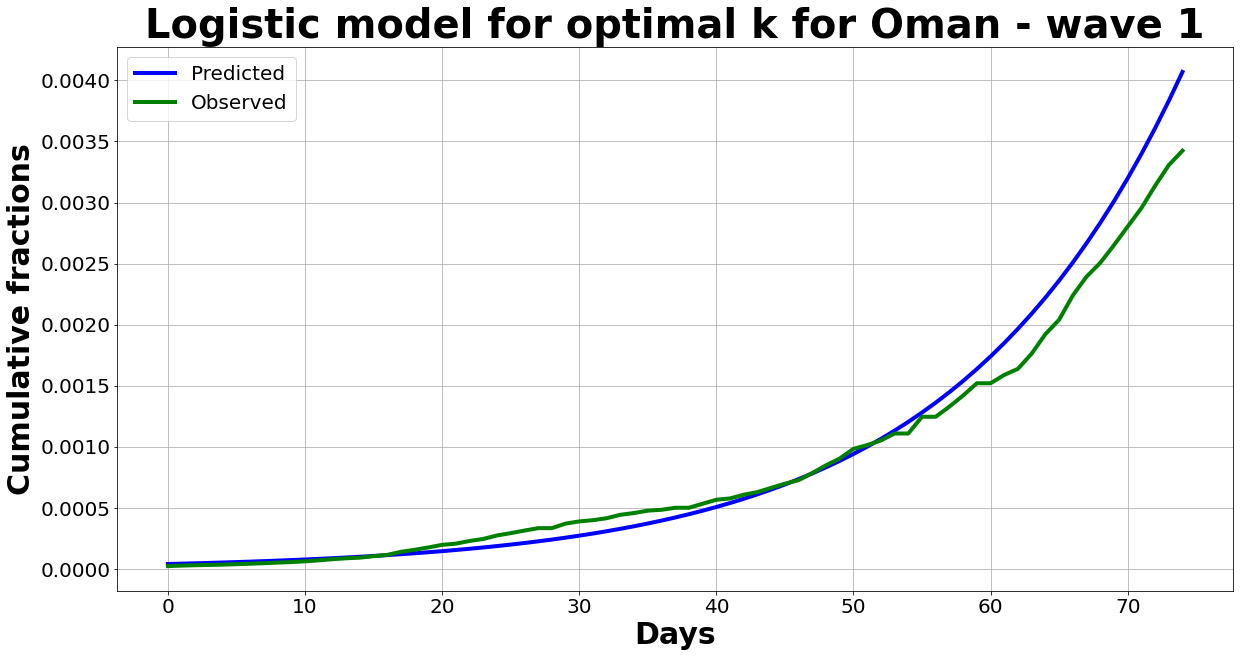

In [102]:
#Plotting Carrying capacity model graph for Oman - wave 1
x = np.array(dfOman['Day_num'])
y = np.array(dfOman['Logistic_final'])
z = np.array(dfOman['Norm'])

plt.figure(figsize=(20,10))
plt.title('Logistic model for optimal k for Oman - wave 1',fontsize=40,weight='bold')
plt.xlabel('Days',fontsize=30,weight='bold')
plt.ylabel('Cumulative fractions',fontsize=30,weight='bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()
plt.plot(x[0:75], y[0:75], 'b',linewidth=4)
plt.plot(x[0:75], z[0:75], 'g',linewidth=4)
plt.legend(['Predicted','Observed'],prop={'size': 20})
#plt.savefig('k3_for_Oman.png')

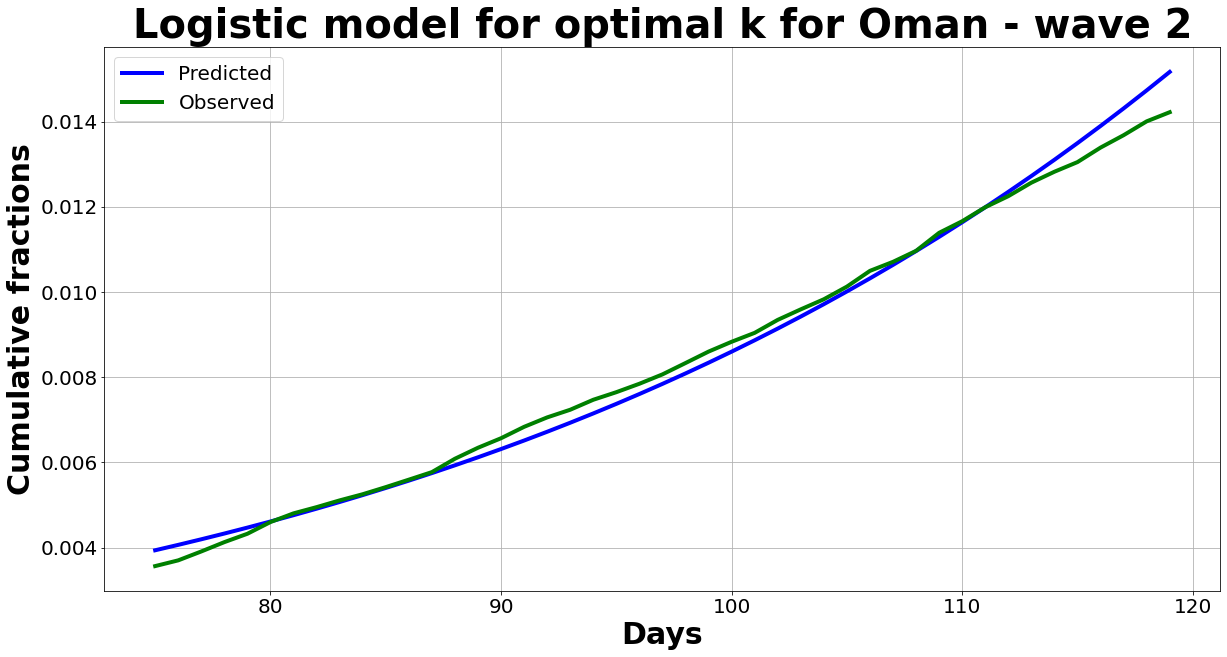

In [105]:
#Plotting Carrying capacity model graph for Oman - wave 1
x = np.array(dfOman['Day_num'])
y = np.array(dfOman['Logistic_final'])
z = np.array(dfOman['Norm'])

plt.figure(figsize=(20,10))
plt.title('Logistic model for optimal k for Oman - wave 2',fontsize=40,weight='bold')
plt.xlabel('Days',fontsize=30,weight='bold')
plt.ylabel('Cumulative fractions',fontsize=30,weight='bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()
plt.plot(x[75:120], y[75:120], 'b',linewidth=4)
plt.plot(x[75:120], z[75:120], 'g',linewidth=4)
plt.legend(['Predicted','Observed'],prop={'size': 20})
plt.savefig('k3_for_Oman.png')

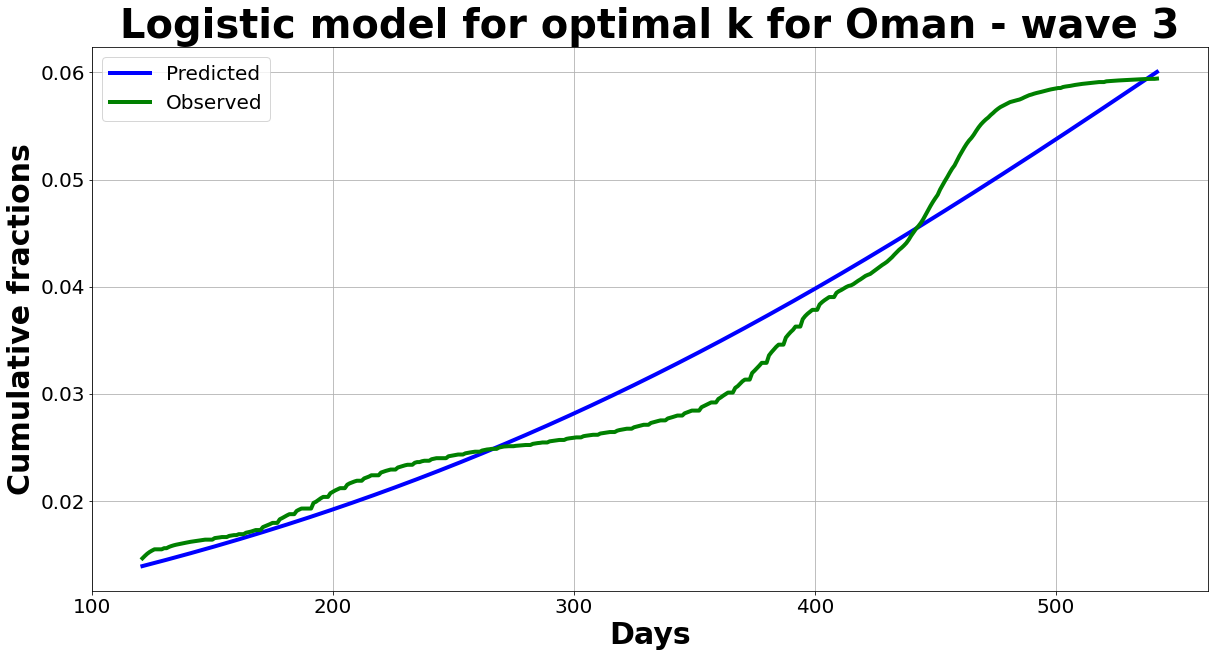

In [104]:
#Plotting Carrying capacity model graph for Oman - wave 1
x = np.array(dfOman['Day_num'])
y = np.array(dfOman['Logistic_final'])
z = np.array(dfOman['Norm'])

plt.figure(figsize=(20,10))
plt.title('Logistic model for optimal k for Oman - wave 3',fontsize=40,weight='bold')
plt.xlabel('Days',fontsize=30,weight='bold')
plt.ylabel('Cumulative fractions',fontsize=30,weight='bold')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()
plt.plot(x[121:543], y[121:543], 'b',linewidth=4)
plt.plot(x[121:543], z[121:543], 'g',linewidth=4)
plt.legend(['Predicted','Observed'],prop={'size': 20})
plt.savefig('k3_for_Oman.png')